In [1]:
import PlayData
import pandas as pd
import numpy as np
%matplotlib inline
from IPython.core.pylabtools import figsize
from matplotlib import pyplot as plt
from pylab import plot,show,hist,figure,title,savefig,rcParams
rcParams['figure.figsize'] = (15, 10)

database = "playstore.db"
displayer = PlayData.PlayData(database)

## Get a pandas dataframe for all the ranking data for each app by date in FINANCE topselling_free

In [6]:
all_ranking_json = displayer.getAllRanks('FINANCE', 'topselling_free')
#all_ranking_json = displayer.getAllRanks('FINANCE', 'topselling_paid')
all_ranking_data = pd.read_json(all_ranking_json)

all_ranking_data = all_ranking_data.rename(columns = {1:'Date'})
all_ranking_data['Date'] = all_ranking_data['Date'].apply(pd.to_datetime)
#all_ranking_data = all_ranking_data.set_index('Date')
all_ranking_data = all_ranking_data.rename(columns = {0:'AppId'})
all_ranking_data = all_ranking_data.rename(columns = {2:'Rank'})
all_ranking_data=all_ranking_data.pivot(index='Date', columns='AppId', values='Rank')


In [ ]:
print all_ranking_data.tail()

## Look for apps whose average ranking went from above 100 to below 50 between the first half and the last half

(42, 750)
(42, 5)


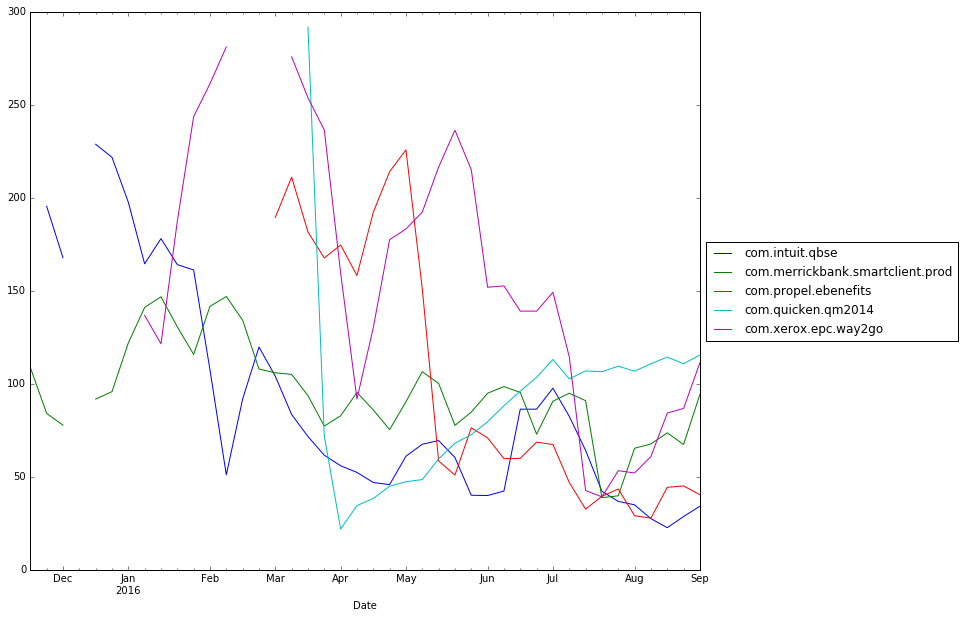

In [10]:
all_ranking_data_average_week = all_ranking_data.resample('w', 'mean')
print all_ranking_data_average_week.shape

#LOOK FOR APPS THAT HAVE A HUGE IMPROVEMENT IN RANKING FROM THE FIRST PART TO THE LAST PART
all_ranking_data_average_week = \
    all_ranking_data_average_week.ix[:,all_ranking_data_average_week[int(all_ranking_data_average_week.shape[0]/2):].min()<50]
all_ranking_data_average_week = \
    all_ranking_data_average_week.ix[:,all_ranking_data_average_week[:int(all_ranking_data_average_week.shape[0]/2)].mean()>100]
#all_ranking_data_average_week = all_ranking_data_average_week.ix[:,all_ranking_data_average_week[:int(all_ranking_data_average_week.shape[0]/2)].mean()<20]

print all_ranking_data_average_week.shape


all_ranking_data_average_week.plot()
ax = plt.gca()

# Shrink current axis by 20%
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.draw()


The app Debt Payoff Planner is ranked 207 on 2016-09-04


/Users/chris/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:17: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
/Users/chris/anaconda/lib/python2.7/site-packages/pandas/core/common.py:449: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask = arr == x


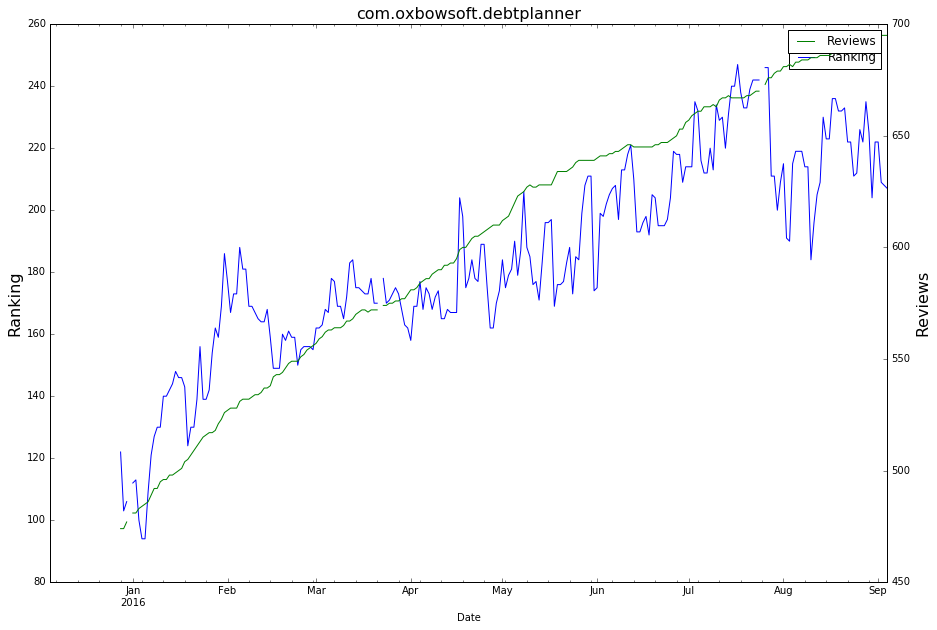

In [4]:
appid = "com.oxbowsoft.debtplanner"
#appid = "com.levelmoney.mobile"
#appid = "com.parabletechnologysystems.debtpayoffcalculator"
title = displayer.getTitle(appid)
(date,rank) = displayer.getRankLatest(appid, 'FINANCE', 'topselling_free')
print "The app %s is ranked %s on %s" % (title, rank, date)
ranking_json = displayer.getDailyInfo(appid, 'FINANCE', 'topselling_free')


ranking_data = pd.read_json(ranking_json)
ranking_data = ranking_data.rename(columns = {0:'Date'})
ranking_data = ranking_data.rename(columns = {1:'Ranking'})
ranking_data = ranking_data.rename(columns = {2:'Reviews'})
ranking_data = ranking_data.rename(columns = {3:'Rating'})

ranking_data['Date'] = ranking_data['Date'].apply(pd.to_datetime)
ranking_data['Reviews'] = ranking_data['Reviews'].convert_objects(convert_numeric=True)

ranking_data = ranking_data.set_index('Date')


try:
    ranking_data=ranking_data.replace(',', '')
    ranking_data['Reviews'] = ranking_data['Reviews'].str.replace(',', '').convert_objects(convert_numeric=True)
except:
    pass

#GET DATA FOR THE WEEK
ranking_data = ranking_data.resample('d', 'mean')

#PLOTTING
# create the general figure

ranking_data.Ranking.plot()
plt.title(appid, fontsize=16)
#ranking_data.Rating.plot()
plt.ylabel('Ranking', fontsize=16)
plt.legend()

ranking_data.Reviews.plot(secondary_y=True, style='g')
plt.ylabel('Reviews', fontsize=16)
#ranking_data.Rating.plot(secondary_y=True, style='g')
#plt.ylabel('Rating', fontsize=16)
plt.legend()
#savefig(appid+'.png')

In [3]:
title = displayer.sendEmail(appid)

com.oxbowsoft.debtplanner.png
failed to send mail


## Table of finance apps ranked by downloads


In [7]:
print all_ranking_data.head()

AppId       ShareBuilderMobile.android  air.com.fxcm.TSmobilePhone  \
Date                                                                 
2015-11-22                         NaN                         NaN   
2015-11-23                         NaN                         NaN   
2015-11-24                         NaN                         NaN   
2015-11-25                         NaN                         NaN   
2015-11-26                         NaN                         NaN   

AppId       app.edwardjones.mobile  appinventor.ai_Newbebiko.Budget  \
Date                                                                  
2015-11-22                     103                              242   
2015-11-23                     107                              242   
2015-11-24                     107                              237   
2015-11-25                     108                              255   
2015-11-26                     103                              245   

AppId      

In [2]:
apps = ['com.oxbowsoft.debtplanner','com.levelmoney.mobile']
comma = "','"
apps_csv = comma.join(apps)
apps_csv = "'"+apps_csv+"'"
print apps_csv
#for appid in apps:
app_reviews_json = displayer.getAppReviews(apps, 'FINANCE', 'topselling_free')
#all_reviews_json = displayer.getAllReviews('FINANCE', 'topselling_paid')
app_reviews_data = pd.read_json(app_reviews_json)

print app_reviews_data.head()
app_reviews_data = app_reviews_data.rename(columns = {1:'Date'})
app_reviews_data['Date'] = app_reviews_data['Date'].apply(pd.to_datetime)
#app_reviews_data = app_reviews_data.set_index('Date')
app_reviews_data = app_reviews_data.rename(columns = {0:'AppId'})
app_reviews_data = app_reviews_data.rename(columns = {2:'Reviews'})
    
    
app_reviews_data=app_reviews_data.drop_duplicates(['Date']).pivot(index='Date', columns='AppId', values='Reviews')
print app_reviews_data.head()

#GET DATA FOR THE WEEK
app_reviews_data = app_reviews_data.resample('w', 'mean')

#PLOTTING
# create the general figure

app_reviews_data[appid].plot(secondary_y=True, style='g')
plt.ylabel('Reviews', fontsize=16)
#ranking_data.Rating.plot(secondary_y=True, style='g')
#plt.ylabel('Rating', fontsize=16)
plt.legend()
#savefig(appid+'.png')

'com.oxbowsoft.debtplanner','com.levelmoney.mobile'


OperationalError: no such column: com.oxbowsoft.debtplanner

In [7]:
print all_reviews_data.describe()
all_reviews_data.plot(style='g')
plt.ylabel('Reviews', fontsize=16)
#ranking_data.Rating.plot(secondary_y=True, style='g')
#plt.ylabel('Rating', fontsize=16)
plt.legend()

       ShareBuilderMobile.android air.com.fxcm.TSmobilePhone  \
count                         179                          3   
unique                        105                          3   
top                         3,803                      3,166   
freq                            9                          1   

       app.edwardjones.mobile appinventor.ai_Newbebiko.Budget  \
count                     252                             146   
unique                     39                              80   
top                       117                           2,406   
freq                       34                               6   

       appinventor.ai_applicationpublisher2012.FreeCreditScore  \
count                                                 129        
unique                                                 53        
top                                                   600        
freq                                                    8        

       appinventor.ai_

TypeError: Empty 'DataFrame': no numeric data to plot

In [42]:
all_reviews_json = displayer.getAllReviews('FINANCE', 'topselling_free')


In [41]:
def remove_comma(string):
    no_comma_string = string.replace(',', '')
    #print no_comma_string
    if no_comma_string == '':
        return 0
    return int(no_comma_string)

#all_reviews_json = displayer.getAllReviews('FINANCE', 'topselling_paid')
all_reviews_data = pd.read_json(all_reviews_json)
print all_reviews_data.head()
all_reviews_data = all_reviews_data.rename(columns = {1:'Date'})
all_reviews_data['Date'] = all_reviews_data['Date'].apply(pd.to_datetime)
#all_reviews_data = all_reviews_data.set_index('Date')
all_reviews_data = all_reviews_data.rename(columns = {0:'AppId'})
all_reviews_data = all_reviews_data.rename(columns = {2:'Reviews'})
all_reviews_data['Reviews'] = all_reviews_data['Reviews'].apply(remove_comma)
print all_reviews_data.head()
all_reviews_data=all_reviews_data.pivot(index='Date', columns='AppId', values='Reviews')
print all_reviews_data.head()

Empty DataFrame
Columns: []
Index: []


KeyError: 'Date'

(252, 4)
(252, 4)


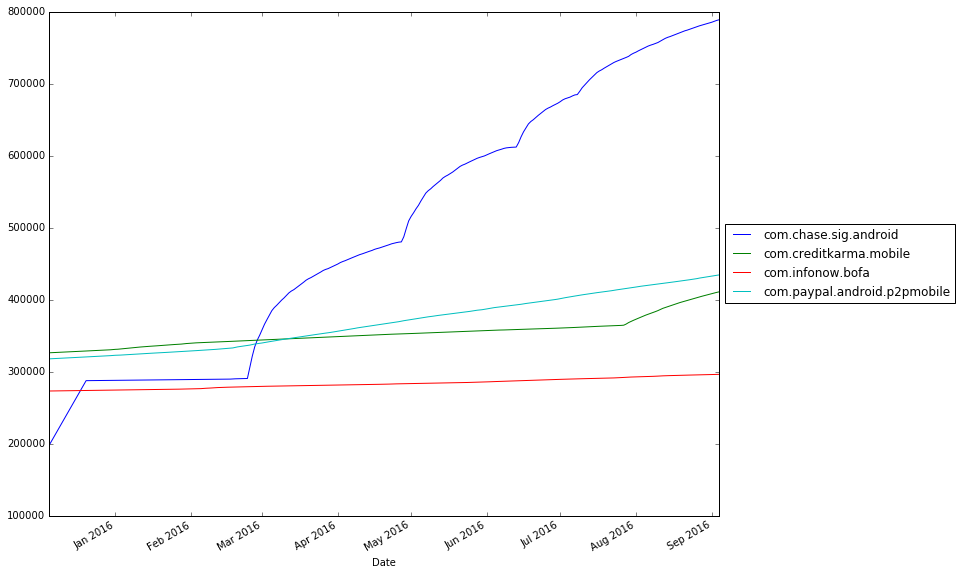

In [37]:

#LOOK FOR APPS THAT HAVE A HUGE IMPROVEMENT IN RANKING FROM THE FIRST PART TO THE LAST PART
#all_reviews_data_average_week = \
    #all_reviews_data_average_week.ix[:,all_reviews_data_average_week[int(all_reviews_data_average_week.shape[0]/2):].min()<50]
all_reviews_data_average_week = \
    all_reviews_data_average_week.ix[:,all_reviews_data_average_week[:int(all_reviews_data_average_week.shape[0]/2)].mean()>200000]
#all_ranking_data_average_week = all_ranking_data_average_week.ix[:,all_ranking_data_average_week[:int(all_ranking_data_average_week.shape[0]/2)].mean()<20]

print all_reviews_data_average_week.shape


#all_reviews_data_average_week = all_reviews_data.resample('w', 'mean')

print all_reviews_data_average_week.shape



all_reviews_data_average_week.plot()
ax = plt.gca()

# Shrink current axis by 20%
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.draw()